# 3. **Elasticidad del Precio**
**Resumen:** El análisis de elasticidad precio-demanda permite evaluar cómo los cambios en los precios afectan la demanda de aguacates. Comprender la elasticidad puede ayudar a formular estrategias de precios más efectivas.

La fórmula de elasticidad precio-demanda es:

$$
E_d = \frac{\% \text{Cambio en la cantidad demandada}}{\% \text{Cambio en el precio}} = \frac{\Delta Q / Q}{\Delta P / P}
$$

# Introducción

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

In [4]:
region_classification = {
'Albany': 'City',
'Atlanta': 'City',
'BaltimoreWashington': 'Region',
'Boise': 'City',
'Boston': 'City',
'BuffaloRochester': 'Region',
'California': 'GreaterRegion',
'Charlotte': 'City',
'Chicago': 'City',
'CincinnatiDayton': 'Region',
'Columbus': 'City',
'DallasFtWorth': 'Region',
'Denver': 'City',
'Detroit': 'City',
'GrandRapids': 'City',
'GreatLakes': 'GreaterRegion',
'HarrisburgScranton': 'Region',
'HartfordSpringfield': 'Region',
'Houston': 'City',
'Indianapolis': 'City',
'Jacksonville': 'City',
'LasVegas': 'City',
'LosAngeles': 'City',
'Louisville': 'City',
'MiamiFtLauderdale': 'Region',
'Midsouth': 'GreaterRegion',
'Nashville': 'City',
'NewOrleansMobile': 'Region',
'NewYork': 'City',
'Northeast': 'GreaterRegion',
'NorthernNewEngland': 'Region',
'Orlando': 'City',
'Philadelphia': 'City',
'PhoenixTucson': 'Region',
'Pittsburgh': 'City',
'Plains': 'GreaterRegion',
'Portland': 'City',
'RaleighGreensboro': 'Region',
'RichmondNorfolk': 'Region',
'Roanoke': 'City',
'Sacramento': 'City',
'SanDiego': 'City',
'SanFrancisco': 'City',
'Seattle': 'City',
'SouthCarolina': 'Region',
'SouthCentral': 'GreaterRegion',
'Southeast': 'GreaterRegion',
'Spokane': 'City',
'StLouis': 'City',
'Syracuse': 'City',
'Tampa': 'City',
'TotalUS': 'TotalUS',
'West': 'GreaterRegion',
'WestTexNewMexico': 'Region'
}

classification_colors = {'City':'green' ,'Region':'yellow' ,'GreaterRegion':'orange', 'State':'red', 'TotalUS': 'blue'}

df_cp['region_class']= df_cp['region'].map(region_classification)

In [5]:
df_cp = df_cp.rename(columns={df.columns[0]: 'Col_0'}) # Primera columna sin titulo, potencialmente eliminable
df_cp = df_cp.rename(columns={'4046': 'Volume_Hass_S'}) # Etiquetas mas descritivas
df_cp = df_cp.rename(columns={'4225': 'Volume_Hass_L'})
df_cp = df_cp.rename(columns={'4770': 'Volume_Hass_XL'})
df_cp = df_cp.drop('Col_0', axis=1) # Parecen IDs del 0 al 52. Eliminable. # Col_0 = df_cp['Col_0'].unique()  print(f"Col_0: {Col_0}\n")

df_convencional = df_cp[df_cp['type'] == 'conventional']
# df_cp_cleaned = df_cp[df_cp.region != 'TotalUS'] # Para seleccionar unicamente las regiones propias , descartamos Total US para la vista gráfica

# Ejercicios tal qual se piden

## 1. **Elasticidad Precio-Demanda por Año:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
     - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.

Descibiendo el problema, al calcular la elasticidad no solo aparece un nan al inicio (Que es lo de menos), sino que aparecen infinitos y menos infinitos que hay que tratar

In [6]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_cp_elast_year = df_cp_elast.sort_values(by=['region','type', 'year'])


# # Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_cp_elast_year['Elasticity'] = df_cp_elast_year['Total Volume'].pct_change() /  df_cp_elast_year['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_year =df_cp_elast_year[-df_cp_elast_year['Elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_year = df_cp_elast_year.loc[1:,:]

Text(0.5, 1.0, 'Sorted year elasticity')

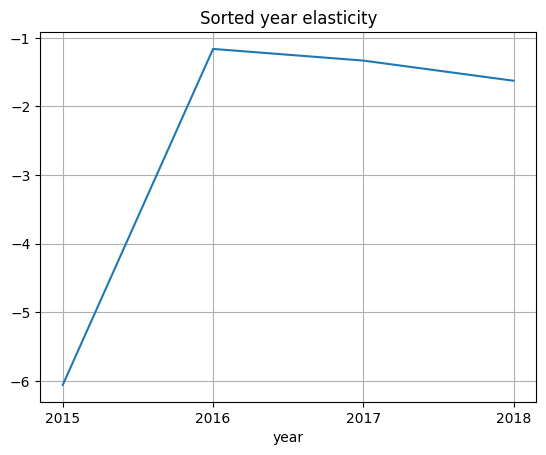

In [7]:
# Creem el group by adient
yearly_elasticity_sort = df_cp_elast_year.loc[1:,:].groupby("year").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
yearly_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'line',ax= ax )
ax.set_xticks(yearly_elasticity_sort.index)
ax.grid()
# plt.ylim(-7.5,2.5)
plt.title('Sorted year elasticity')

Text(0.5, 1.0, 'Sorted year elasticity')

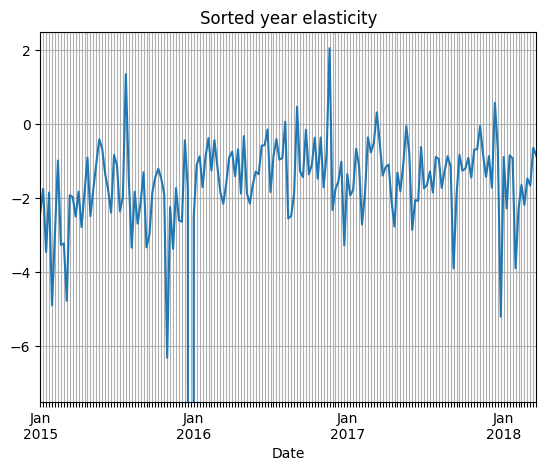

In [8]:
# Creem el group by adient
yearly_elasticity_sort = df_cp_elast_year.loc[1:,:].groupby("Date").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
yearly_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'line',ax= ax )
ax.set_xticks(yearly_elasticity_sort.index)
ax.grid()
plt.ylim(-7.5,2.5)
plt.title('Sorted year elasticity')

# yearly_elasticity_sort

## 2. **Comparación de Elasticidad en Diferentes Mercados:**
   - **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.

In [9]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region', 'type', 'year'])


# # Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Elasticity'] = df_elast_sort['Total Volume'].pct_change() /  df_elast_sort['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_elast_sort =df_elast_sort[-df_elast_sort['Elasticity'].isin([-np.inf,np.inf])]
df_elast_sort = df_elast_sort.loc[1:,:]
df_elast_sort

,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_class,Elasticity
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City,-9.689427
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City,-3.710176
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City,-2.057296
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City,-1.910871
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,City,-6.194632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Region,1.781953
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Region,-3.802723
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Region,-0.093331
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Region,5.520447


Text(0.5, 1.0, 'Sorted region elasticity')

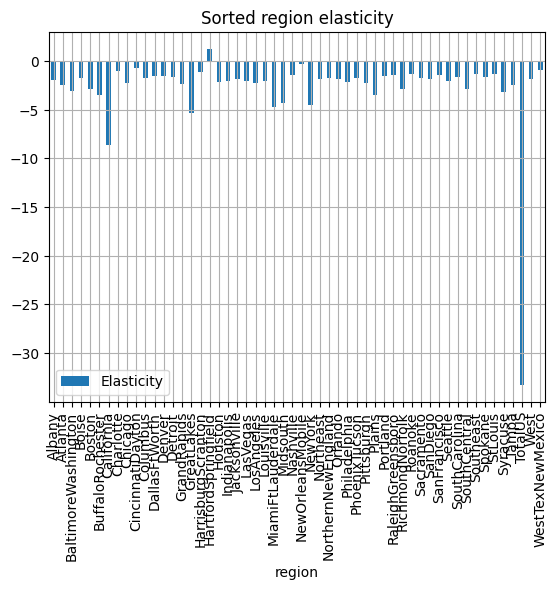

In [10]:
# Creem el group by adient
region_elasticity_sort = df_elast_sort.loc[1:,:].groupby("region").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
region_elasticity_sort.plot(kind = 'bar',ax= ax )
# ax.set_xticks(region_elasticity_sort.index)
ax.grid()
plt.title('Sorted region elasticity')

Text(0.5, 1.0, 'Sorted region elasticity')

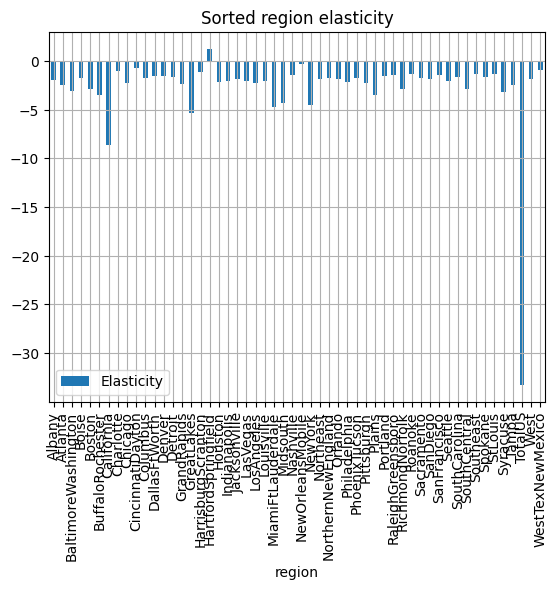

In [11]:
# Creem el group by adient
# [df_elast_sort.region != 'TotalUS']
region_elasticity_sort = df_elast_sort.loc[1:,:].groupby("region").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
region_elasticity_sort.plot(kind = 'bar',ax= ax )
# ax.set_xticks(region_elasticity_sort.index)
ax.grid()
plt.title('Sorted region elasticity')

## 3. **Elasticidad a Nivel de Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.

In [12]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast_bags = df_cp.copy().sort_values(by=['region', 'year'])

df_cp_elast_bags['Small bag elasticity']= df_cp_elast_bags['Small Bags'].pct_change() /  df_cp_elast_bags['AveragePrice'].pct_change()
df_cp_elast_bags['Large bag elasticity']= df_cp_elast_bags['Large Bags'].pct_change() /  df_cp_elast_bags['AveragePrice'].pct_change()
df_cp_elast_bags['XLarge bag elasticity']= df_cp_elast_bags['XLarge Bags'].pct_change() /  df_cp_elast_bags['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['Small bag elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['Large bag elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['XLarge bag elasticity'].isin([-np.inf,np.inf])]

df_cp_elast_bags = df_cp_elast_bags.loc[1:,:]

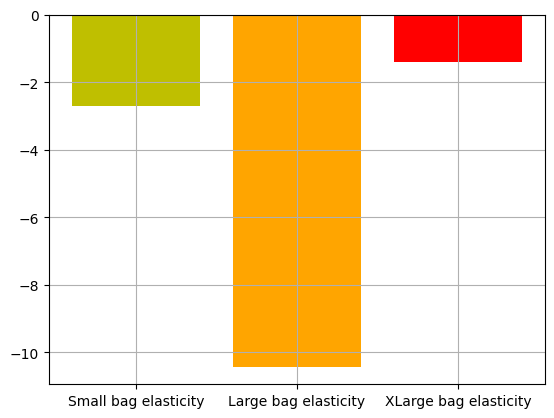

In [13]:
bag_means = df_cp_elast_bags.loc[:,['Small bag elasticity','Large bag elasticity','XLarge bag elasticity']].mean()

labels= ['Small bag elasticity','Large bag elasticity','XLarge bag elasticity']

plt.bar(x=labels, height = bag_means, color = ('y', 'orange', 'r'))
plt.grid()

## 4. **Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `type`.
   - **Esperado:** Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
     - Agrupa los datos por `type` y calcula la elasticidad utilizando `pd.pct_change()`.
     - Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando `plt.bar()`.

In [14]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'Date'])


# # Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Elasticity'] = df_elast_sort['Total Volume'].pct_change() /  df_elast_sort['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_elast_sort =df_elast_sort[-df_elast_sort['Elasticity'].isin([-np.inf,np.inf])]
df_elast_sort = df_elast_sort.loc[1:,:]

Text(0.5, 1.0, 'Sorted type elasticity')

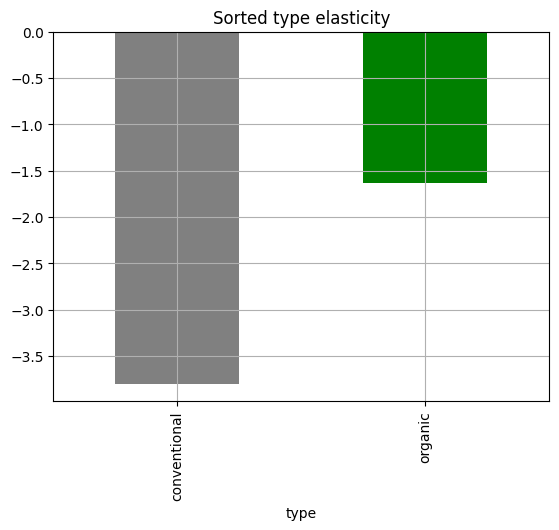

In [15]:
# Creem el group by adient
type_elasticity_sort = df_elast_sort.loc[1:,:].groupby("type").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
type_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'bar',ax= ax, color = ['gray','green'])
# ax.set_xticks(region_elasticity_sort.index)
ax.grid()
plt.title('Sorted type elasticity')

## 5. **Análisis de la Elasticidad Precios-Ventas:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.

Text(0.5, 1.0, 'Sorted year elasticity')

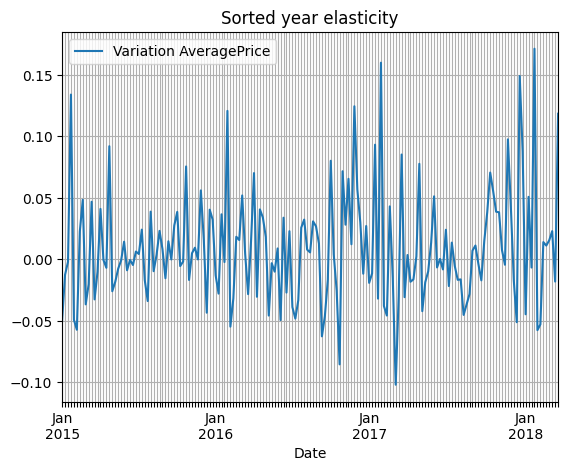

In [16]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'year'])

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Variation Total Volume'] = df_elast_sort['Total Volume'].pct_change()   
df_elast_sort['Variation AveragePrice'] = df_elast_sort['AveragePrice'].pct_change()

df_elast_sort = df_elast_sort.loc[1:,:]

# Creem el group by adient
yearly_elasticity_sort = df_elast_sort.groupby("Date").agg({'Variation AveragePrice':"mean"})

#Plotejem
fig, ax = plt.subplots()
yearly_elasticity_sort.plot(kind = 'line',ax= ax )
ax.set_xticks(yearly_elasticity_sort.index)
ax.grid()
# plt.ylim(-7.5,2.5)
plt.title('Sorted year elasticity')

# yearly_elasticity_sort

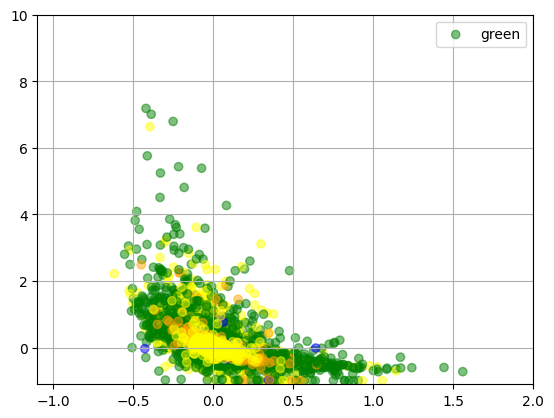

In [17]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'year'])

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Variation Total Volume'] = df_elast_sort['Total Volume'].pct_change()   
df_elast_sort['Variation AveragePrice'] = df_elast_sort['AveragePrice'].pct_change()

df_elast_sort = df_elast_sort.loc[1:,:]


y_values= df_elast_sort.loc[1:,'Variation Total Volume']
x_values= df_elast_sort.loc[1:,'Variation AveragePrice']
z_values= df_elast_sort.loc[1:,'region_class'].map(classification_colors)


fig, ax = plt.subplots( )
ax.scatter(x=x_values,y= y_values, c=z_values, alpha=0.5)#.map(coloring_alcovados)
plt.ylim(-1.1,10)
plt.xlim(-1.1,2)
ax.grid()
plt.legend(z_values)
plt.show()

# import seaborn as sns
# sns.lmplot(x='Variation AveragePrice',y='Variation Total Volume',data=df_cp_elast_year,fit_reg=True)
# plt.ylim(-1.5,10)
# plt.xlim(-1.1,2)
# plt.grid()
# plt.show()

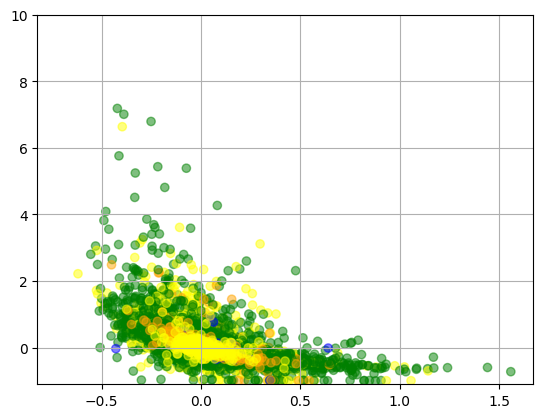

In [18]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'year'])

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Variation Total Volume'] = df_elast_sort['Total Volume'].pct_change()   
df_elast_sort['Variation AveragePrice'] = df_elast_sort['AveragePrice'].pct_change()

df_elast_sort = df_elast_sort.loc[1:,:]


y_values= df_elast_sort.loc[1:,'Variation Total Volume']
x_values= df_elast_sort.loc[1:,'Variation AveragePrice']
z_values= df_elast_sort.loc[1:,'region_class'].map(classification_colors)

fig, ax = plt.subplots( )
ax.scatter(x=x_values,y= y_values, c=z_values, alpha=0.5)
plt.ylim(-1.1,10)
# plt.xlim(-1.1,2)
ax.grid()
plt.show()


# Further studies

Els apartats anteriors han mostrat tendencies claras, pero encara aixi es complicat separar els efectes de convergencia de múltiples variables. Es per això que tractarem de fer subsets per a veure els efectes mes clars.

Addicionalment tractarem de fer els càlculs d'elasticitat un cop fetes les separacions en el df

## 2.1. Elasticidad Sobre el tiempo (Conventional USA)

In [19]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_sort = df_cp_elast.sort_values(by=['region','type', 'year'])

df_USA = df_sort[df_sort['region']=='TotalUS']

df_USA_conv = df_USA[df_USA['type']=='conventional'].copy()
df_USA_conv['Elasticity'] = df_USA_conv['Total Volume'].pct_change() /  df_USA_conv['AveragePrice'].pct_change()
df_USA_conv =df_USA_conv[-df_USA_conv['Elasticity'].isin([-np.inf,np.inf])]

df_USA_organic = df_USA[df_USA['type']=='organic'].copy()
df_USA_organic['Elasticity'] = df_USA_organic['Total Volume'].pct_change() /  df_USA_organic['AveragePrice'].pct_change()
df_USA_organic =df_USA_organic[-df_USA_organic['Elasticity'].isin([-np.inf,np.inf])]

Text(0.5, 1.0, 'Sorted year elasticity')

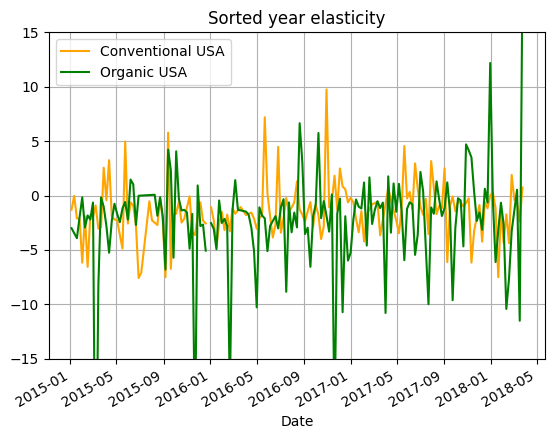

In [20]:
# Creem el group by adient
USA_conv_year = df_USA_conv.loc[1:,:].groupby("Date").agg({'Elasticity':"mean"})
USA_org_year = df_USA_organic.loc[1:,:].groupby("Date").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
USA_conv_year.loc[:,'Elasticity'].plot(kind = 'line',ax= ax, label= 'Conventional USA', color = 'orange' )
USA_org_year.loc[:,'Elasticity'].plot(kind = 'line',ax= ax, label= 'Organic USA', color = 'green' )
# ax.set_xticks(USA_conv_year.index)
ax.grid()
plt.legend()
plt.ylim(-15,15)
plt.title('Sorted year elasticity')

Text(0.5, 1.0, 'Sorted type elasticity')

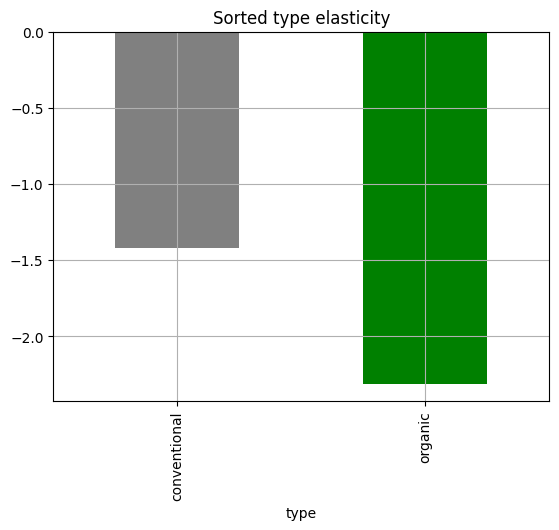

In [21]:
# Creem el group by adient
df_USA_temp = df_USA.copy()
df_USA_temp['Elasticity'] = df_USA_temp['Total Volume'].pct_change() /  df_USA_temp['AveragePrice'].pct_change()
df_USA_temp =df_USA_temp[-df_USA_temp['Elasticity'].isin([-np.inf,np.inf])]

type_elasticity_sort = df_USA_temp.loc[1:,:].groupby("type").agg({'Elasticity':"mean"})

type_elasticity_sort

#Plotejem
fig, ax = plt.subplots()
type_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'bar',ax= ax, color = ['gray','green'])
# ax.set_xticks(region_elasticity_sort.index)
ax.grid()
plt.title('Sorted type elasticity')

Text(0.5, 1.0, 'Sorted year elasticity')

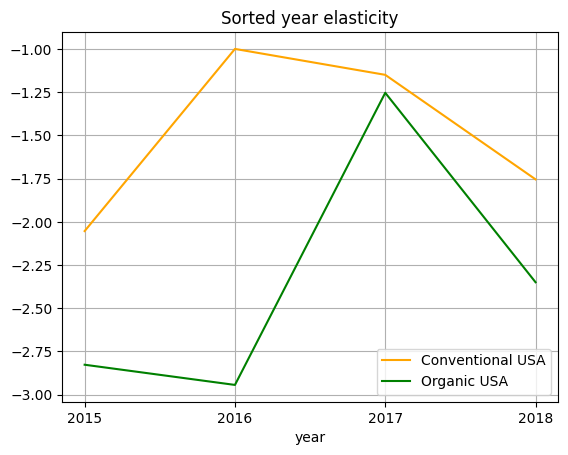

In [22]:
# Creem el group by adient
USA_conv_year = df_USA_conv.loc[1:,:].groupby("year").agg({'Elasticity':"mean"})
USA_org_year = df_USA_organic.loc[1:,:].groupby("year").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
USA_conv_year.loc[:,'Elasticity'].plot(kind = 'line',ax= ax, label= 'Conventional USA', color = 'orange' )
USA_org_year.loc[:,'Elasticity'].plot(kind = 'line',ax= ax, label= 'Organic USA', color = 'green' )
ax.set_xticks(USA_conv_year.index)
ax.grid()
ax.legend()
# plt.ylim(-7.5,2.5)
plt.title('Sorted year elasticity')

## 2.2. Elasticidad por Regiones, harémos por regiones mas grandes y en funcion del tiempo. Solo convencionales.

Text(0.5, 1.0, 'Sorted year elasticity')

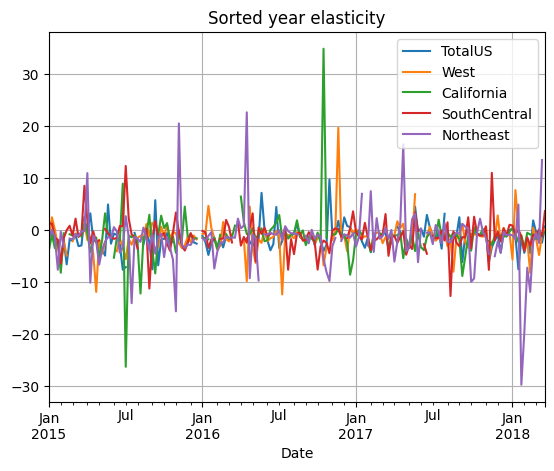

In [23]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()
region_largest= df_sort.groupby('region')['Total Volume'].sum().nlargest(5).index

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_sort = df_cp_elast.sort_values(by=['region','type', 'year'])
df_sort_conv = df_sort[df_sort['type'] == 'conventional'].copy()

fig, ax= plt.subplots()
for region in region_largest:

    region_subset = df_sort_conv[  df_sort_conv['region']== region ].copy()
    region_subset['Elasticity'] = region_subset['Total Volume'].pct_change() /  region_subset['AveragePrice'].pct_change()
    temp_groupby = region_subset.loc[1:,:].groupby('Date').agg({'Elasticity':"mean"})

    temp_groupby.loc[:,'Elasticity'].plot(kind = 'line', label = region, ax=ax)

ax.grid()
ax.legend()
# plt.ylim(-15,15)
plt.title('Sorted year elasticity')



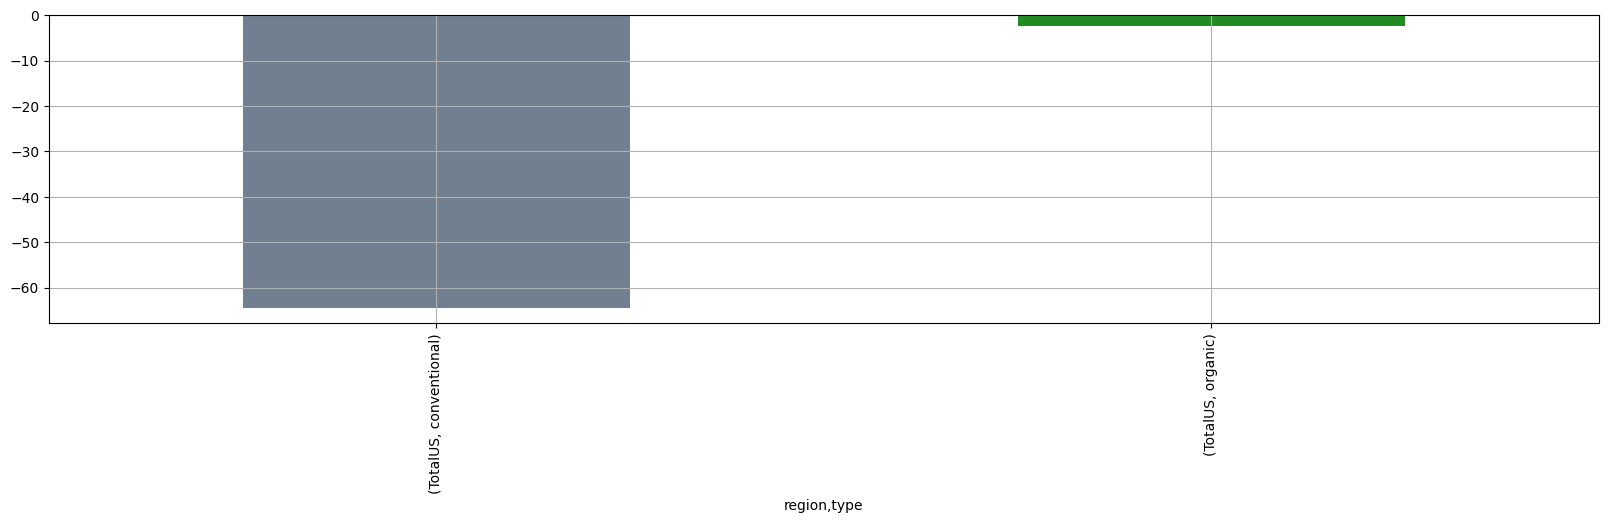

In [24]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'year'])


# # Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Elasticity'] = df_elast_sort['Total Volume'].pct_change() /  df_elast_sort['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_elast_sort =df_elast_sort[-df_elast_sort['Elasticity'].isin([-np.inf,np.inf])]
df_elast_sort = df_elast_sort.loc[1:,:]

#######################################################################################################################
df_elast_sort= df_elast_sort[df_elast_sort['region']=='TotalUS']
avocados_elasticity_mean = df_elast_sort.groupby(['region','type'])['Elasticity'].mean()#.nlargest(6)

avocados_elasticity_mean

fig, ax= plt.subplots(figsize=(20,4))
# avocados_relative_mean = (avocados_region_mean - total_mean)*100/total_mean
avocados_elasticity_mean.plot(kind = 'bar', color = ['slategray', 'forestgreen'])
plt.grid()

# Otros

## Prueba USA

In [25]:
##Veig coses molt rares per a total US. Probem 

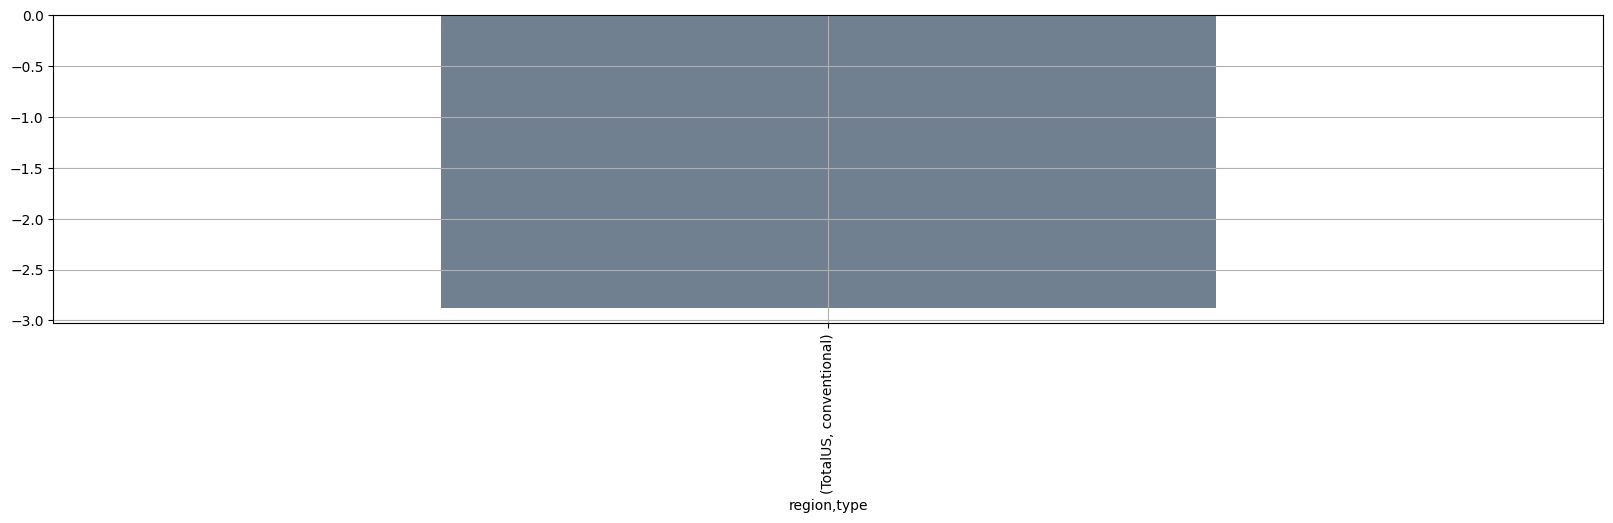

In [26]:
######### Calculo por cada region
# Creacion de la variable elasticidad y eliminacion de valores no utiles
# df_cp_elast = df_cp.copy()

df_cp_elast = df_cp_elast[df_cp_elast['type'] == 'conventional']

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'Date'])


# # Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Elasticity'] = df_elast_sort['Total Volume'].pct_change() /  df_elast_sort['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_elast_sort =df_elast_sort[-df_elast_sort['Elasticity'].isin([-np.inf,np.inf])]
df_elast_sort = df_elast_sort.loc[1:,:]

#######################################################################################################################
df_elast_sort= df_elast_sort[df_elast_sort['region']=='TotalUS']

avocados_elasticity_mean = df_elast_sort.groupby(['region','type'])['Elasticity'].mean()#.nlargest(6)

fig, ax= plt.subplots(figsize=(20,4))
# avocados_relative_mean = (avocados_region_mean - total_mean)*100/total_mean
avocados_elasticity_mean.plot(kind = 'bar', color = ['slategray', 'forestgreen'])
plt.grid()



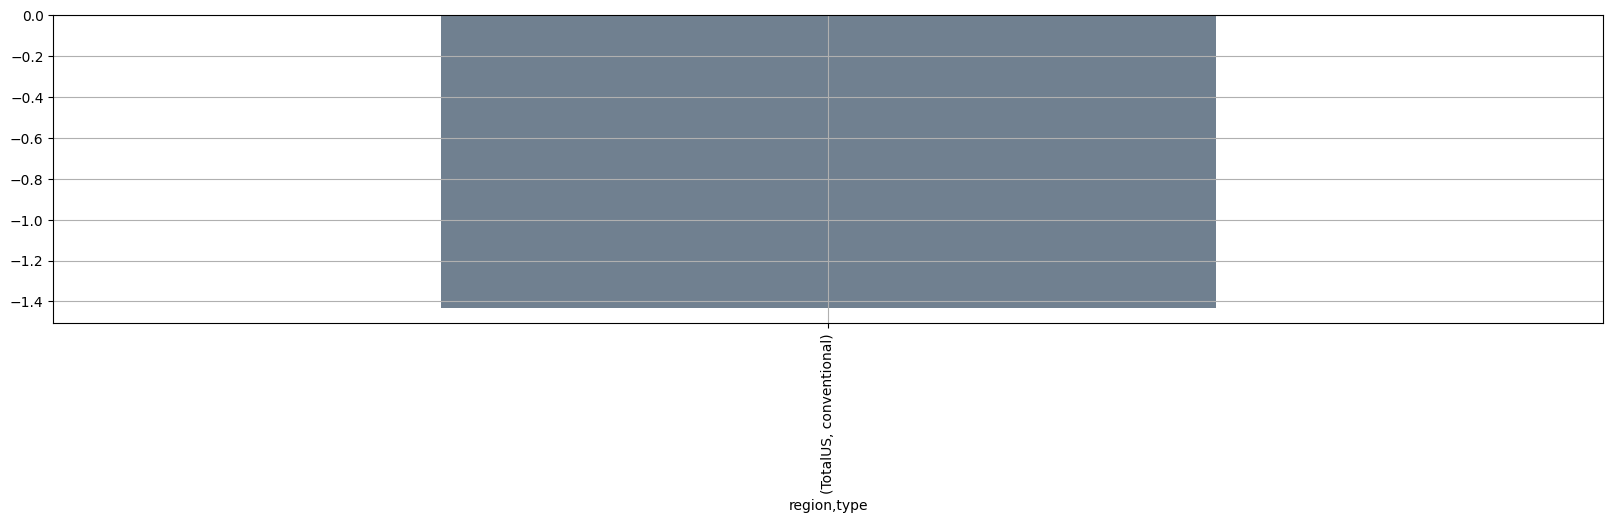

In [27]:
######### Calculo por cada region
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

df_cp_elast = df_cp_elast[df_cp_elast['type'] == 'conventional']
df_cp_elast = df_cp_elast[df_cp_elast['region'] == 'TotalUS']

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_elast_sort = df_cp_elast.sort_values(by=['region','type', 'Date']).reset_index()


# # Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_elast_sort['Elasticity'] = df_elast_sort['Total Volume'].pct_change() /  df_elast_sort['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net


#########Important a comentar (TODO TO explain in presentation)
df_elast_sort =df_elast_sort[-df_elast_sort['Elasticity'].isin([-np.inf,np.inf])]
df_elast_sort = df_elast_sort.loc[1:,:]

#######################################################################################################################
# df_elast_sort= df_elast_sort[df_elast_sort['region']=='TotalUS']
avocados_elasticity_mean = df_elast_sort.groupby(['region','type'])['Elasticity'].mean()#.nlargest(6)

avocados_elasticity_mean

fig, ax= plt.subplots(figsize=(20,4))
# avocados_relative_mean = (avocados_region_mean - total_mean)*100/total_mean
avocados_elasticity_mean.plot(kind = 'bar', color = ['slategray', 'forestgreen'])
plt.grid()

## Regiones correctas

In [28]:
# Ara sabem que hem d'anar amb molta compte a la mesura 

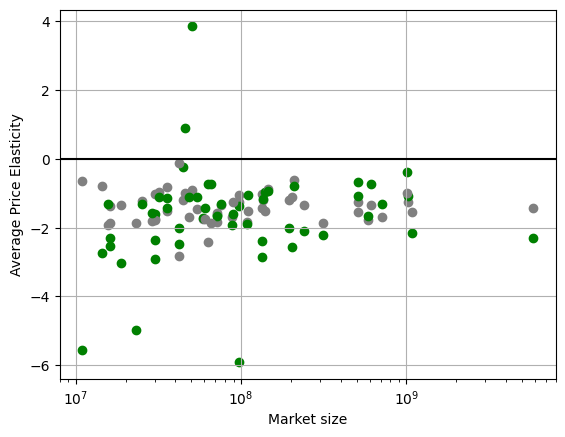

In [56]:
# # Aqui podem veure que a majors mercats el preu mig tendeix a abaratirse. Aqui estem prenent cada regio com equivalentment valida
# # cambiar el 2018 no parece afectar los resultados
# df_cp_elast = df_cp.copy()

# df_cp_elast= df_cp_elast.sort_values(by=['region','type', 'year'])

# fig, ax=plt.subplots()

# for region in pd.unique(df_cp_elast['region']):

#     elast_region = df_cp_elast[df_cp_elast['region'] == region].copy()
#     temp_market_size= elast_region['Total Volume'].sum()


#     conventional_df = elast_region[elast_region['type'] == 'conventional'].copy().reset_index()
#     conventional_df['Elasticity'] = conventional_df['Total Volume'].pct_change() /  conventional_df['AveragePrice'].pct_change()
#     conventional_df =conventional_df[-conventional_df['Elasticity'].isin([-np.inf,np.inf])]
    
#     conv_value = conventional_df.loc[1:,'Elasticity'].mean()

#     # display(conventional_df.loc[1:,'Elasticity'])

#     # print(conv_value)

#     org_df = elast_region[elast_region['type'] == 'organic'].copy().reset_index()
#     org_df['Elasticity'] = org_df['Total Volume'].pct_change() /  org_df['AveragePrice'].pct_change()
#     org_df =org_df[-org_df['Elasticity'].isin([-np.inf,np.inf])]
#     org_value = org_df.loc[1:,'Elasticity'].mean()

#     # print(temp_market_size, conv_value, org_value)
#     ax.scatter(x=temp_market_size, y= conv_value, color = 'gray')
#     ax.scatter(x=temp_market_size, y= org_value, color = 'green')

# plt.xscale('log')
# plt.ylabel('Average Price Elasticity')
# plt.axhline(0, color='black', linewidth=1.5, linestyle='-')  # Horizontal line at y=0
# plt.xlabel('Market size')
# plt.grid()
# plt.show()

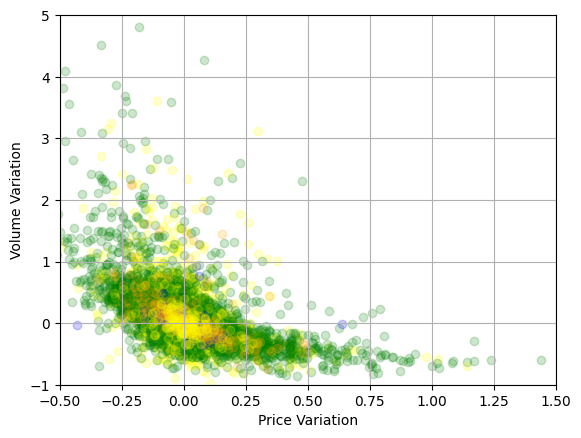

In [30]:
# # Aqui podem veure que a majors mercats el preu mig tendeix a abaratirse. 
# #Aqui estem prenent cada regio com equivalentment valida
# # cambiar el 2018 no parece afectar los resultados
# df_cp_elast = df_cp.copy()
# df_cp_elast= df_cp_elast.sort_values(by=['region','type', 'year'])

# # df_cp_elast = df_cp_elast[df_cp_elast['type']=='conventional']

# fig, ax=plt.subplots()

# for region in pd.unique(df_cp_elast['region']):

#     elast_region = df_cp_elast[df_cp_elast['region'] == region].copy()
#     # temp_market_size= elast_region['Total Volume'].sum()


#     conventional_df = elast_region[elast_region['type'] == 'organic'].copy().reset_index()
#     conventional_df['Variation Volume'] = conventional_df['Total Volume'].pct_change() 
#     conventional_df['Variation AveragePrice'] =  conventional_df['AveragePrice'].pct_change()

    
#     color= classification_colors[conventional_df.loc[1,'region_class']]#.map(classification_colors)
#     y_values = conventional_df.loc[1:,'Variation Volume']
#     x_values = conventional_df.loc[1:,'Variation AveragePrice']
#     ax.scatter(x=x_values, y= y_values, color = color, alpha = 0.2)

# # plt.xscale('log')
# plt.ylabel('Volume Variation')
# plt.xlabel('Price Variation')
# plt.ylim(-1,5)
# plt.xlim(-0.5,1.5)
# plt.grid()
# plt.show()

## Los siguientes son interesantes hasta el final

#### Comparativa Variacion volumen precio, en tipos aguacate

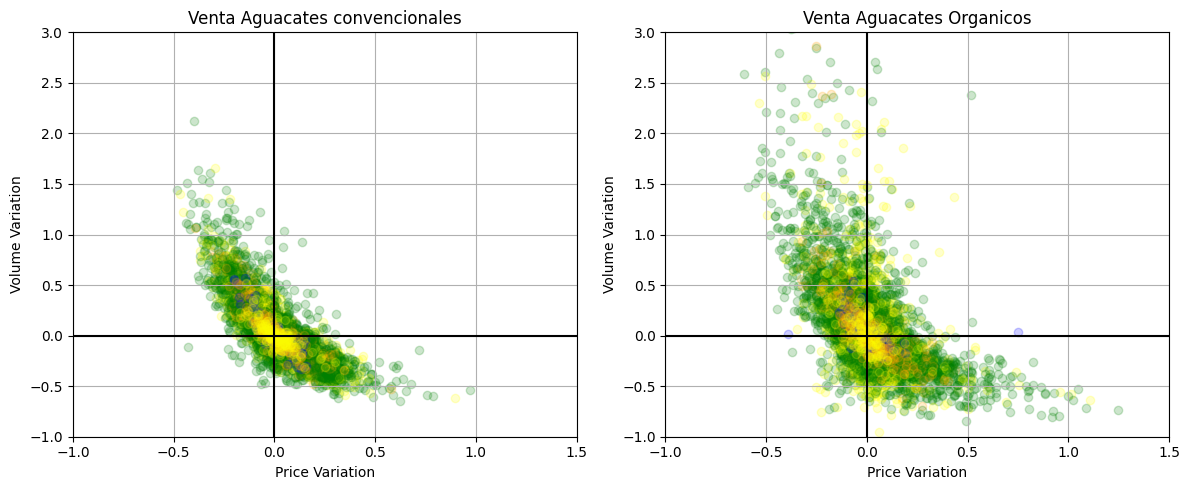

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_cp_elast = df_cp.copy()
df_cp_elast= df_cp_elast.sort_values(by=['region','type', 'Date'])

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

for region in pd.unique(df_cp_elast['region']):

    elast_region = df_cp_elast[df_cp_elast['region'] == region].copy()

    conventional_df = elast_region[elast_region['type'] == 'conventional'].copy().reset_index()
    conventional_df['Variation Volume'] = conventional_df['Total Volume'].pct_change() 
    conventional_df['Variation AveragePrice'] =  conventional_df['AveragePrice'].pct_change()

    color= classification_colors[conventional_df.loc[1,'region_class']]#.map(classification_colors)
    y_values = conventional_df.loc[1:,'Variation Volume']
    x_values = conventional_df.loc[1:,'Variation AveragePrice']
    axs[0].scatter(x=x_values, y= y_values, color = color, alpha = 0.2)
    


    organic_df = elast_region[elast_region['type'] == 'organic'].copy().reset_index()
    organic_df['Variation Volume'] = organic_df['Total Volume'].pct_change() 
    organic_df['Variation AveragePrice'] =  organic_df['AveragePrice'].pct_change()

    
    color= classification_colors[organic_df.loc[1,'region_class']]#.map(classification_colors)
    y_values_org = organic_df.loc[1:,'Variation Volume']
    x_values_org  = organic_df.loc[1:,'Variation AveragePrice']
    axs[1].scatter(x=x_values_org, y= y_values_org, color = color, alpha = 0.2)


# axs[0].set_xscale('log')
axs[0].set_ylabel('Volume Variation')
axs[0].set_xlabel('Price Variation')
axs[0].set_ylim(-1,3)
axs[0].set_xlim(-1,1.5)
axs[0].set_title('Venta Aguacates convencionales')
axs[0].axhline(0, color='black', linewidth=1.5, linestyle='-')  # Horizontal line at y=0
axs[0].axvline(0, color='black', linewidth=1.5, linestyle='-')  # Vertical line at x=0

axs[0].grid()

axs[1].set_ylabel('Volume Variation')
axs[1].set_xlabel('Price Variation')
axs[1].set_ylim(-1,3)
axs[1].set_xlim(-1,1.5)
axs[1].set_title('Venta Aguacates Organicos')
axs[1].grid()
axs[1].axhline(0, color='black', linewidth=1.5, linestyle='-')  # Horizontal line at y=0
axs[1].axvline(0, color='black', linewidth=1.5, linestyle='-')  # Vertical line at x=0

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el espaciado
plt.show()



#### Elasticidad por region con barras

,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_class
51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,City
50,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,City
49,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,City
48,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany,City
47,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18241,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico,Region
18240,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico,Region
18239,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico,Region
18238,2018-03-18,1.56,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,0.0,organic,2018,WestTexNewMexico,Region


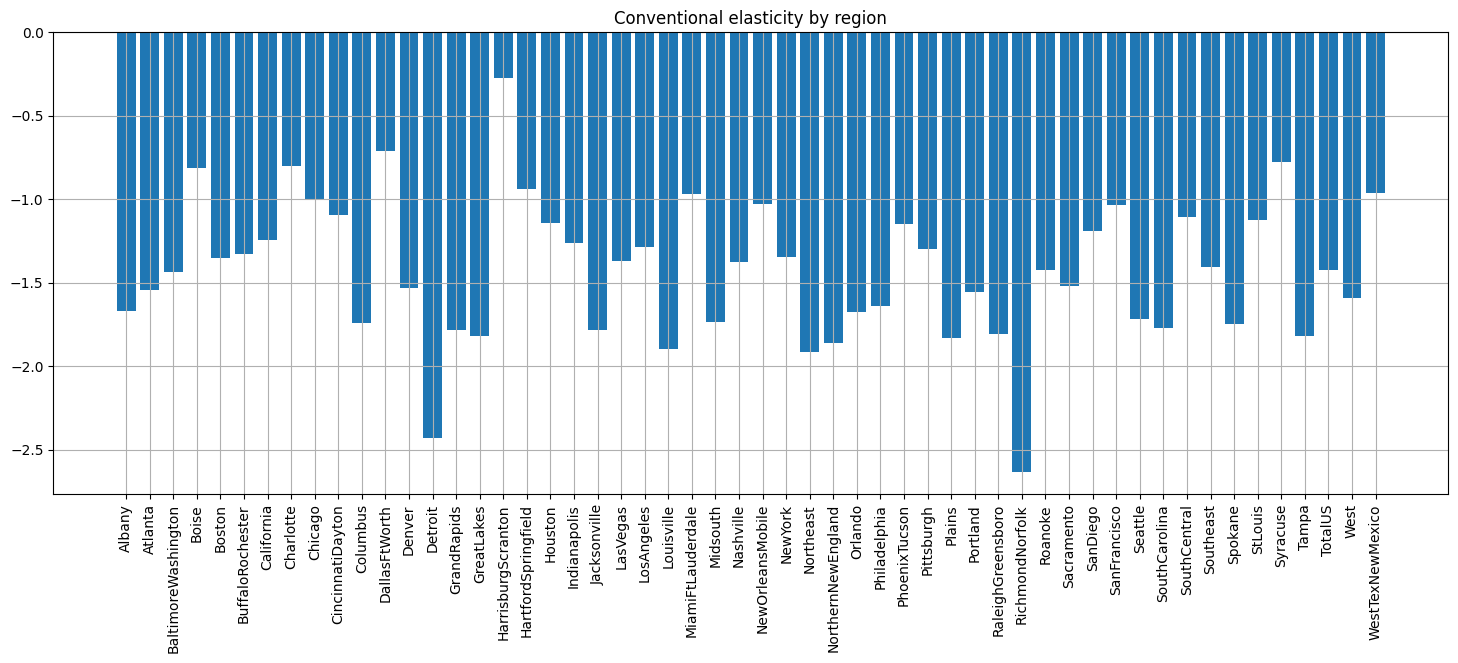

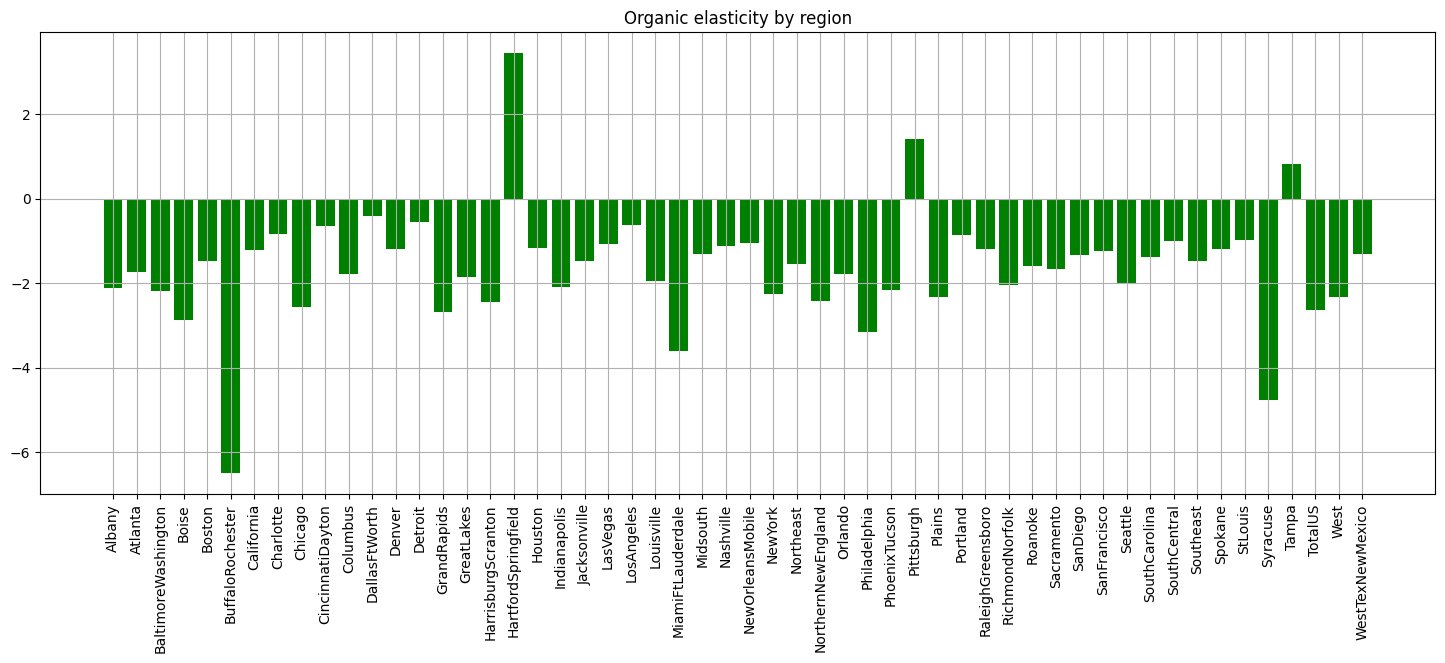

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_cp_elast = df_cp.copy()
df_cp_elast= df_cp_elast.sort_values(by=['region','type', 'Date'])

# Crear la figura y los subplots

labels_reg_conv= []
elasticty_av_conv = []

labels_reg_org= []
elasticty_av_org = []

for region in pd.unique(df_cp_elast['region']):

    elast_region = df_cp_elast[df_cp_elast['region'] == region].copy()

    conventional_df = elast_region[elast_region['type'] == 'conventional'].copy().reset_index()


    
    conventional_df['Elasticity'] = conventional_df['Total Volume'].pct_change() /  conventional_df['AveragePrice'].pct_change()
    conventional_df =conventional_df[-conventional_df['Elasticity'].isin([-np.inf,np.inf])]
    conventional_df = conventional_df.iloc[1:-1,:]




    labels_reg_conv.append(region)
    elasticty_av_conv.append(conventional_df['Elasticity'].mean())

    organic_df = elast_region[elast_region['type'] == 'organic'].copy().reset_index()
    organic_df['Elasticity'] = organic_df['Total Volume'].pct_change() /  organic_df['AveragePrice'].pct_change()
    organic_df =organic_df[-organic_df['Elasticity'].isin([-np.inf,np.inf])]
    organic_df = organic_df.iloc[1:-1,:]

    labels_reg_org.append(region)
    elasticty_av_org.append(organic_df['Elasticity'].mean())

# fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas
fig, ax= plt.subplots(figsize=(18,6) )
ax.bar(x=labels_reg_conv ,height = elasticty_av_conv , label = labels_reg_conv)
plt.xticks(rotation=90)
plt.title('Conventional elasticity by region')
plt.grid()
plt.show()

# fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas
fig, ax= plt.subplots(figsize=(18,6) )
ax.bar(x=labels_reg_org ,height = elasticty_av_org , label = labels_reg_org, color = 'green')
plt.xticks(rotation=90)
plt.title('Organic elasticity by region')
plt.grid()
plt.show()
    
    

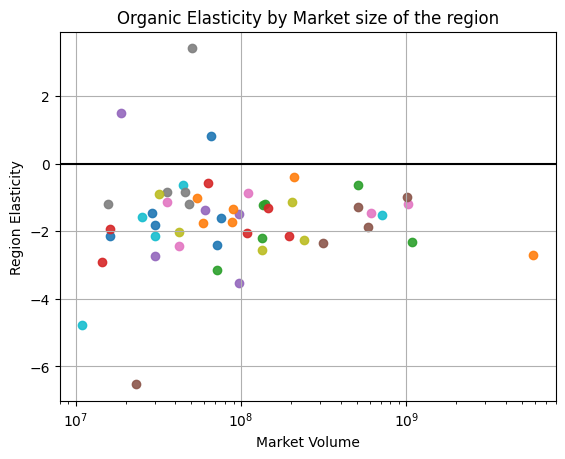

In [61]:
# Aqui podem veure que a majors mercats el preu mig tendeix a abaratirse. 
#Aqui estem prenent cada regio com equivalentment valida
# cambiar el 2018 no parece afectar los resultados
df_cp_elast = df_cp.copy()

# df_cp_elast = df_cp_elast[df_cp_elast['region']!= 'TotalUS']

df_cp_elast= df_cp_elast.sort_values(by=['region','type', 'Date'])

# display(df_cp_elast)

# df_cp_elast = df_cp_elast[df_cp_elast['type']=='conventional']

fig, ax=plt.subplots()

for region in pd.unique(df_cp_elast['region']):

    elast_region = df_cp_elast[df_cp_elast['region'] == region].copy()
    temp_market_size= elast_region['Total Volume'].sum()

    organic_df = elast_region[elast_region['type'] == 'organic'].copy().reset_index()
    organic_df['Variation Volume'] = organic_df['Total Volume'].pct_change() 
    organic_df['Variation AveragePrice'] =  organic_df['AveragePrice'].pct_change()

    organic_df['Elasticity'] = organic_df['Total Volume'].pct_change() / organic_df['AveragePrice'].pct_change()
    
    organic_df = organic_df[-organic_df['Elasticity'].isin([-np.inf,np.inf])]

    
    # color= classification_colors[conventional_df.loc[1,'region_class']]#.map(classification_colors)
    y_values = organic_df.loc[1:,'Elasticity'].mean()
    x_values = organic_df.loc[1:,'Variation AveragePrice']
    ax.scatter(x=temp_market_size, y= y_values, alpha = 0.9, label= region)

plt.xscale('log')
plt.ylabel('Region Elasticity')
plt.xlabel('Market Volume')
plt.axhline(0, color='black', linewidth=1.5, linestyle='-')  # Horizontal line at y=0
plt.title('Organic Elasticity by Market size of the region')
# plt.legend()
plt.grid()
plt.show()

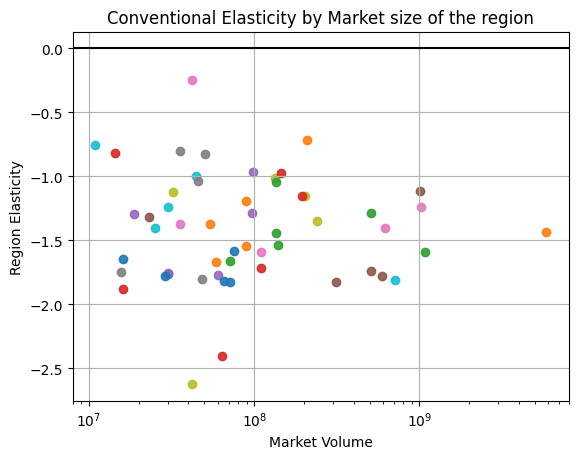

In [62]:
# Aqui podem veure que a majors mercats el preu mig tendeix a abaratirse. 
#Aqui estem prenent cada regio com equivalentment valida
# cambiar el 2018 no parece afectar los resultados
df_cp_elast = df_cp.copy()

df_cp_elast= df_cp_elast.sort_values(by=['region','type', 'Date'])

fig, ax=plt.subplots()

for region in pd.unique(df_cp_elast['region']):

    elast_region = df_cp_elast[df_cp_elast['region'] == region].copy()
    temp_market_size= elast_region['Total Volume'].sum()


    conventional_df = elast_region[elast_region['type'] == 'conventional'].copy().reset_index()
    conventional_df['Variation Volume'] = conventional_df['Total Volume'].pct_change() 
    conventional_df['Variation AveragePrice'] =  conventional_df['AveragePrice'].pct_change()

    conventional_df['Elasticity'] = conventional_df['Total Volume'].pct_change() / conventional_df['AveragePrice'].pct_change()
    
    conventional_df = conventional_df[-conventional_df['Elasticity'].isin([-np.inf,np.inf])]

    
    # color= classification_colors[conventional_df.loc[1,'region_class']]#.map(classification_colors)
    y_values = conventional_df.loc[1:,'Elasticity'].mean()
    x_values = conventional_df.loc[1:,'Variation AveragePrice']
    ax.scatter(x=temp_market_size, y= y_values, alpha = 0.9, label= region)

plt.xscale('log')
plt.ylabel('Region Elasticity')
plt.xlabel('Market Volume')
plt.axhline(0, color='black', linewidth=1.5, linestyle='-')  # Horizontal line at y=0
plt.title('Conventional Elasticity by Market size of the region')
# plt.legend()
plt.grid()
plt.show()

## Regiones correctas Bag elasticity

,index,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_class,Small bag Variation,Large bag Variation,XLarge bag Variation
0,363,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California,GreaterRegion,NaN,NaN,NaN
1,362,2015-01-11,0.92,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,2015,California,GreaterRegion,0.069923,-0.334329,-0.010753
2,361,2015-01-18,1.02,5570915.26,2780859.66,2108450.36,121614.31,559990.93,520299.26,36501.18,3190.49,conventional,2015,California,GreaterRegion,0.019075,0.145170,0.108696
3,360,2015-01-25,1.06,4929884.26,2380955.61,1827783.28,150535.50,570609.87,521004.15,46809.48,2796.24,conventional,2015,California,GreaterRegion,0.001355,0.282410,0.039216
4,359,2015-02-01,0.85,9032180.67,4794142.14,3460743.80,177145.49,600149.24,556205.20,41203.20,2740.84,conventional,2015,California,GreaterRegion,0.067564,-0.119768,-0.198113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,8554,2018-02-25,1.03,6750361.46,2666133.31,1947660.32,110662.05,2025905.78,1908897.38,42064.35,74944.05,conventional,2018,California,GreaterRegion,0.163326,-0.105201,-0.063636
165,8553,2018-03-04,1.13,6295529.61,2380723.98,1676629.99,116796.74,2121378.90,1992549.07,47126.97,81702.86,conventional,2018,California,GreaterRegion,0.043822,0.120354,0.097087
166,8552,2018-03-11,1.11,6488605.43,2277437.31,1750118.87,108244.33,2352804.92,2230913.33,41105.34,80786.25,conventional,2018,California,GreaterRegion,0.119628,-0.127775,-0.017699
167,8551,2018-03-18,1.02,6802084.11,2161037.82,2305253.24,94087.86,2241705.19,2116307.93,38597.17,86800.09,conventional,2018,California,GreaterRegion,-0.051372,-0.061018,-0.081081


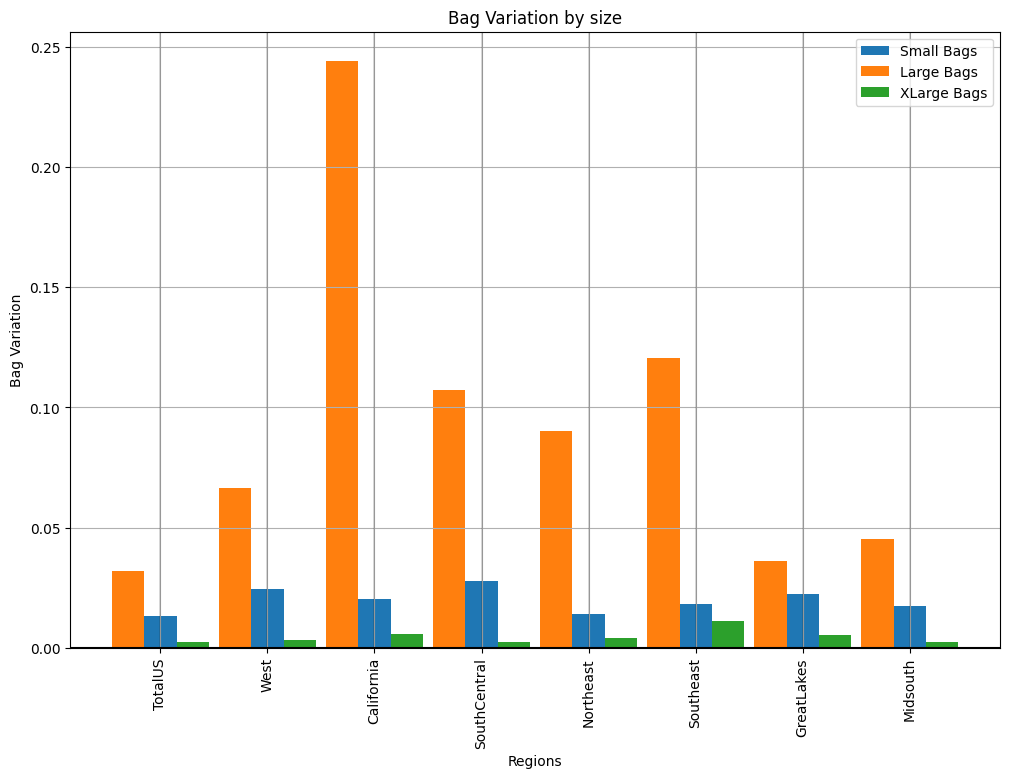

In [120]:
# Aqui podem veure que a majors mercats el preu mig tendeix a abaratirse. 
#Aqui estem prenent cada regio com equivalentment valida
# cambiar el 2018 no parece afectar los resultados
df_cp_elast = df_cp.copy()
df_cp_elast= df_cp_elast.sort_values(by=['region','type', 'Date'])

region_largest= df_cp_elast.groupby('region')['Total Volume'].sum().nlargest(8).index

type_avocado = 'conventional'

labels = []

small_heights = []
Large_heights = []
XLarge_heights = []



for region in pd.unique(region_largest):


    # region = 'TotalUS'
    elast_region_bags = df_cp_elast[df_cp_elast['region'] == region].copy()
    elast_region_bags = elast_region_bags[elast_region_bags['type'] == type_avocado].copy().reset_index()

    
    # temp_market_size= elast_region['Total Volume'].sum()

    elast_region_bags['Small bag Variation']= elast_region_bags['Small Bags'].pct_change()# /  elast_region_bags['AveragePrice'].pct_change()
    elast_region_bags['Large bag Variation']= elast_region_bags['Large Bags'].pct_change() #/  elast_region_bags['AveragePrice'].pct_change()
    elast_region_bags['XLarge bag Variation']= elast_region_bags['XLarge Bags'].pct_change() #/  elast_region_bags['AveragePrice'].pct_change()
    elast_region_bags['XLarge bag Variation']= elast_region_bags['AveragePrice'].pct_change()


    # # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
    # elast_region_bags =elast_region_bags[-elast_region_bags['Small bag elasticity'].isin([-np.inf,np.inf])]
    # elast_region_bags =elast_region_bags[-elast_region_bags['Large bag elasticity'].isin([-np.inf,np.inf])]
    # elast_region_bags =elast_region_bags[-elast_region_bags['XLarge bag elasticity'].isin([-np.inf,np.inf])]

    small_heights.append(elast_region_bags['Small bag Variation'].mean())
    Large_heights.append(elast_region_bags['Large bag Variation'].mean())
    XLarge_heights.append(elast_region_bags['XLarge bag Variation'].mean())
    labels.append(region)

    if region == 'California':
        display(elast_region_bags)
        
    


fig, ax=plt.subplots(figsize= (12,8))

# Define the positions for the bars on the x-axis
x = np.arange(len(labels))
width = 0.3  # Width of the bars
distance = 0.3

bar1 = ax.bar(x , small_heights, width, label='Small Bags')
bar2 = ax.bar(x - distance , Large_heights, width, label='Large Bags')
bar3 = ax.bar(x + distance, XLarge_heights, width, label='XLarge Bags')

# Labels and title
ax.set_xlabel('Regions')
ax.set_ylabel('Bag Variation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.title('Bag Variation by size')
plt.axhline(0, color='black', linewidth=1.5, linestyle='-')  # Horizontal line at y=0

for x_value in x:
    plt.axvline(x_value, color='black', linewidth=0.2, linestyle='-') 
    
plt.xticks(rotation=90)
plt.grid()
# Show the plot
plt.show()

,level_0,index,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_class,Small bag elasticity,Large bag elasticity,XLarge bag elasticity
10,12,2379,2015-03-29,0.82,5713017.35,3091049.63,1836365.62,89374.20,696227.90,633029.23,63160.07,38.60,conventional,2015,SouthCentral,GreaterRegion,2.166751,-6.271725,7.920000
11,13,2378,2015-04-05,0.83,6368728.85,3676642.17,1856953.20,104285.22,730848.26,670637.73,58681.56,1528.97,conventional,2015,SouthCentral,GreaterRegion,4.871650,-5.814399,3166.070984
12,14,2377,2015-04-12,0.80,5930072.71,3851189.34,1385674.25,102729.01,590480.11,536034.76,54424.19,21.16,conventional,2015,SouthCentral,GreaterRegion,5.552947,2.007227,27.283777
13,15,2376,2015-04-19,0.82,5593885.09,3657278.94,1183497.85,114923.71,638184.59,538970.63,99203.37,10.59,conventional,2015,SouthCentral,GreaterRegion,0.219081,32.911233,-19.981096
14,16,2375,2015-04-26,0.83,5578980.69,3637682.35,1248422.73,73076.91,619798.70,519975.08,99430.45,393.17,conventional,2015,SouthCentral,GreaterRegion,-2.890019,0.187701,2962.375826


          level_0        index                           Date  AveragePrice  \
count  156.000000   156.000000                            156    156.000000   
mean    85.980769  5574.416667  2016-08-27 20:46:09.230769152      0.872372   
min      0.000000  2341.000000            2015-01-04 00:00:00      0.620000   
25%     43.750000  2383.500000            2015-11-06 06:00:00      0.780000   
50%     87.500000  5182.500000            2016-09-07 12:00:00      0.835000   
75%    128.250000  8024.250000            2017-06-19 18:00:00      0.932500   
max    168.000000  9029.000000            2018-03-25 00:00:00      1.340000   
std     49.082481  2450.562342                            NaN      0.143487   

       Total Volume  Volume_Hass_S  Volume_Hass_L  Volume_Hass_XL  \
count  1.560000e+02   1.560000e+02   1.560000e+02      156.000000   
mean   5.876758e+06   3.127538e+06   1.293206e+06   125474.259487   
min    3.733135e+06   1.193350e+06   7.136460e+05     6332.780000   
25%    5.201

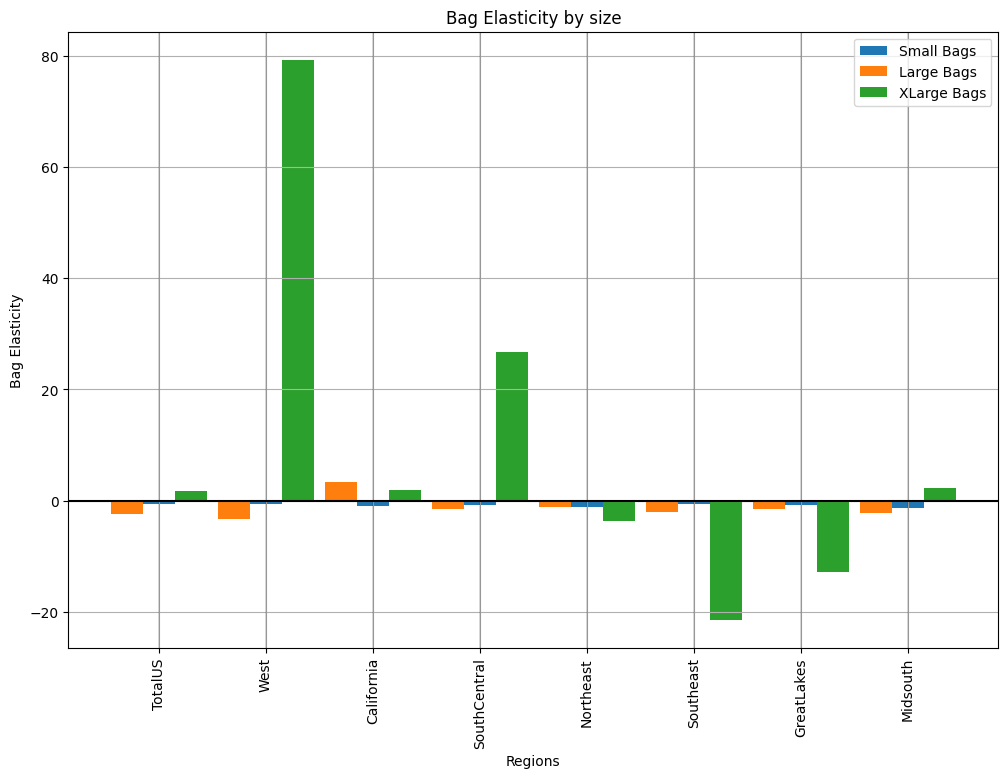

In [137]:
# Aqui podem veure que a majors mercats el preu mig tendeix a abaratirse. 
#Aqui estem prenent cada regio com equivalentment valida
# cambiar el 2018 no parece afectar los resultados
df_cp_elast = df_cp.copy()
df_cp_elast= df_cp_elast.sort_values(by=['region','type', 'Date'])

region_largest= df_cp_elast.groupby('region')['Total Volume'].sum().nlargest(8).index

type_avocado = 'conventional'

labels = []

small_heights = []
Large_heights = []
XLarge_heights = []



for region in pd.unique(region_largest):


    # region = 'TotalUS'
    elast_region_bags = df_cp_elast[df_cp_elast['region'] == region].copy()
    elast_region_bags = elast_region_bags[elast_region_bags['type'] == type_avocado].copy().reset_index()

    
    # temp_market_size= elast_region['Total Volume'].sum()

    elast_region_bags['Small bag elasticity']= elast_region_bags['Small Bags'].pct_change() /  elast_region_bags['AveragePrice'].pct_change()
    elast_region_bags['Large bag elasticity']= elast_region_bags['Large Bags'].pct_change() /  elast_region_bags['AveragePrice'].pct_change()
    elast_region_bags['XLarge bag elasticity']= elast_region_bags['XLarge Bags'].pct_change() /  elast_region_bags['AveragePrice'].pct_change()
    # elast_region_bags['XLarge bag Variation']= elast_region_bags['AveragePrice'].pct_change()


    # # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
    elast_region_bags =elast_region_bags[-elast_region_bags['Small bag elasticity'].isin([-np.inf,np.inf])]
    elast_region_bags =elast_region_bags[-elast_region_bags['Large bag elasticity'].isin([-np.inf,np.inf])]
    elast_region_bags =elast_region_bags[-elast_region_bags['XLarge bag elasticity'].isin([-np.inf,np.inf])]

    elast_region_bags = elast_region_bags.reset_index()

    small_heights.append(elast_region_bags.loc[1:,'Small bag elasticity'].mean())
    Large_heights.append(elast_region_bags.loc[1:,'Large bag elasticity'].mean())
    XLarge_heights.append(elast_region_bags.loc[1:,'XLarge bag elasticity'].mean())
    labels.append(region)

    if region == 'SouthCentral':
        display(elast_region_bags.loc[10:14,:])# [elast_region_bags['XLarge bag elasticity'] > 200])
        print(elast_region_bags.describe())
        
    


fig, ax=plt.subplots(figsize= (12,8))

# Define the positions for the bars on the x-axis
x = np.arange(len(labels))
width = 0.3  # Width of the bars
distance = 0.3

bar1 = ax.bar(x , small_heights, width, label='Small Bags')
bar2 = ax.bar(x - distance , Large_heights, width, label='Large Bags')
bar3 = ax.bar(x + distance, XLarge_heights, width, label='XLarge Bags')

# Labels and title
ax.set_xlabel('Regions')
ax.set_ylabel('Bag Elasticity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.title('Bag Elasticity by size')
plt.axhline(0, color='black', linewidth=1.5, linestyle='-')  # Horizontal line at y=0

for x_value in x:
    plt.axvline(x_value, color='black', linewidth=0.2, linestyle='-') 
    
plt.xticks(rotation=90)
plt.grid()
# Show the plot
plt.show()

# Repetir estudio, pero solo USA

In [34]:
df_USA= df_cp[df_cp['region'] == 'TotalUS'].copy()
df_USA= df_USA.sort_values(by=['Date'])
df_USA_org = df_USA[df_USA['type'] == 'organic'].copy()
df_USA_org['Elasticity'] = df_USA_org['Total Volume'].pct_change() /  df_USA_org['AveragePrice'].pct_change()
df_USA_org =df_USA_org[-df_USA_org['Elasticity'].isin([-np.inf,np.inf])].reset_index()
df_USA_org = df_USA_org.loc[1:,]


df_USA_conv = df_USA[df_USA['type'] == 'conventional'].copy()
df_USA_conv['Elasticity'] = df_USA_conv['Total Volume'].pct_change() /  df_USA_conv['AveragePrice'].pct_change()
df_USA_conv =df_USA_conv[-df_USA_conv['Elasticity'].isin([-np.inf,np.inf])].reset_index()
df_USA_conv = df_USA_conv.loc[1:,]

Text(0.5, 1.0, 'Sorted year elasticity')

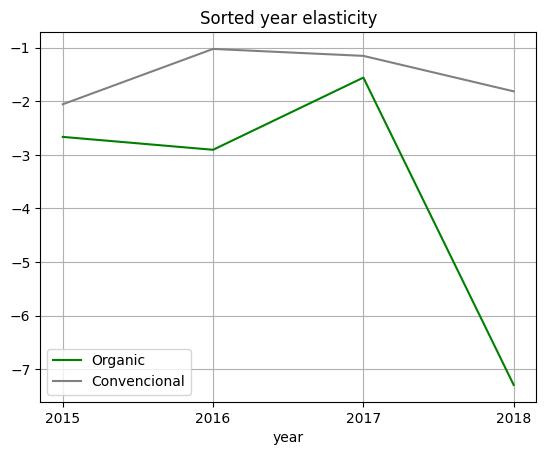

In [36]:
# Creem el group by adient
organic_year_USA = df_USA_org.groupby("year").agg({'Elasticity':"mean"})
conv_year_USA = df_USA_conv.groupby("year").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
organic_year_USA.loc[:,'Elasticity'].plot(kind = 'line',ax= ax, color= 'green', label = 'Organic' )
conv_year_USA.loc[:,'Elasticity'].plot(kind = 'line',ax= ax, color= 'gray', label = 'Convencional' )
plt.legend()
ax.set_xticks(conv_year_USA.index)
ax.grid()
plt.title('Sorted year elasticity')

Text(0.5, 1.0, 'Sorted Date elasticity')

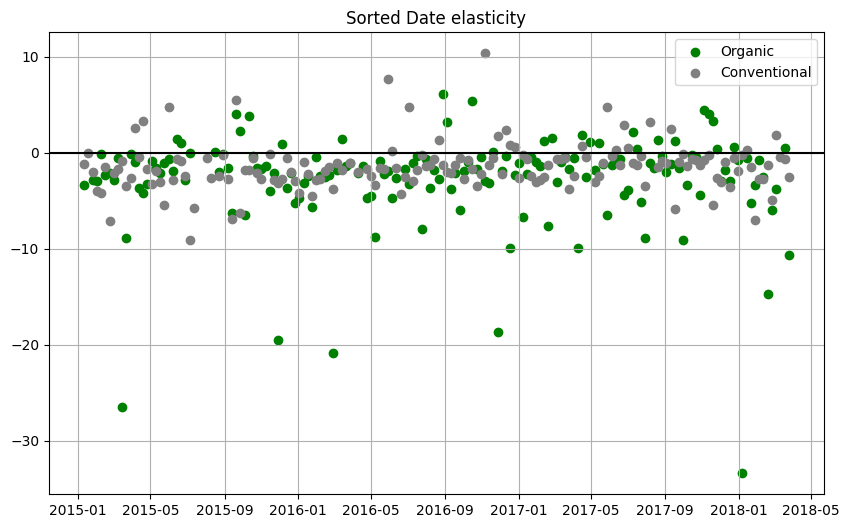

In [40]:
#Plotejem
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(df_USA_org['Date'],  df_USA_org['Elasticity'], color= 'green', label= 'Organic' )
plt.scatter(df_USA_conv['Date'],  df_USA_conv['Elasticity'], color= 'Gray', label= 'Conventional' )
# ax.set_xticks(conv_year_USA.index)
ax.axhline(0, color='black', linewidth=1.5, linestyle='-')  # Horizontal line at y=0
ax.grid()
# plt.ylim(-10,10)
plt.legend()
plt.title('Sorted Date elasticity')

In [70]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast_bags = df_USA[df_USA['type']=='conventional'].copy().sort_values(by=['region', 'Date']).reset_index()

df_cp_elast_bags['Small bag elasticity']= df_cp_elast_bags['Small Bags'].pct_change() /  df_cp_elast_bags['AveragePrice'].pct_change()
df_cp_elast_bags['Large bag elasticity']= df_cp_elast_bags['Large Bags'].pct_change() /  df_cp_elast_bags['AveragePrice'].pct_change()
df_cp_elast_bags['XLarge bag elasticity']= df_cp_elast_bags['XLarge Bags'].pct_change() /  df_cp_elast_bags['AveragePrice'].pct_change()

# # Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['Small bag elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['Large bag elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['XLarge bag elasticity'].isin([-np.inf,np.inf])]

df_cp_elast_bags = df_cp_elast_bags.loc[1:,:]

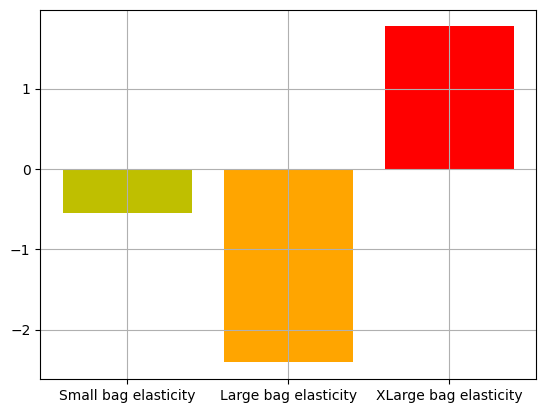

In [71]:
bag_means = df_cp_elast_bags.loc[:,['Small bag elasticity','Large bag elasticity','XLarge bag elasticity']].mean()

labels= ['Small bag elasticity','Large bag elasticity','XLarge bag elasticity']

plt.bar(x=labels, height = bag_means, color = ('y', 'orange', 'r'))
plt.grid()